In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [4]:
df = df.drop(labels='id', axis='columns')

In [5]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [6]:
df.Sex.value_counts()

Sex
M    27084
I    23957
F    23010
Name: count, dtype: int64

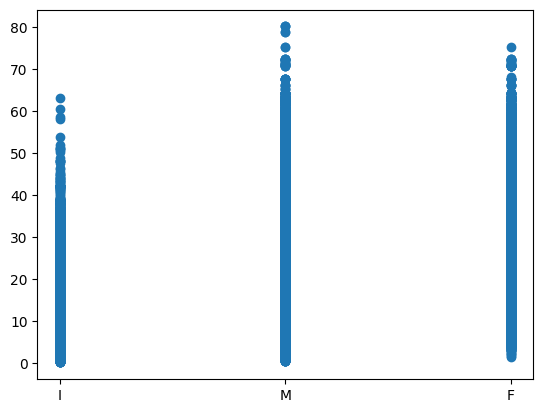

In [7]:
plt.scatter(df['Sex'], df['Weight'])
plt.show()

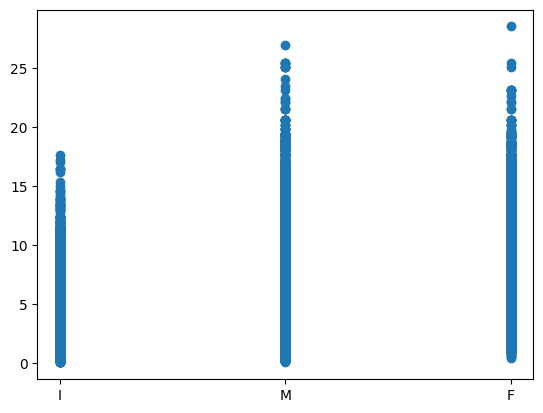

In [8]:
plt.scatter(df['Sex'], df['Shell Weight'])
plt.show()

In [9]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [10]:
gender_map = {
    'I': 1,
    'F': 2,
    'M': 3,
}

df['Sex'] = [gender_map[t] for t in df['Sex']]


In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']] = sc.fit_transform(df[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['Age'], test_size=0.2, random_state=42)

In [13]:
X_train, y_train

(       Sex    Length  Diameter    Height    Weight  Shucked Weight  \
 20612    3  1.025316  0.528672  0.564040  0.623359        0.916300   
 2935     2  0.721238  0.633982  0.699861  0.540426        0.378879   
 73847    3  0.634359  0.581327  0.428220  0.453011        0.537835   
 46445    3 -0.668832 -0.577081 -1.201624 -0.821230       -0.819594   
 66755    1 -1.581066 -1.630180 -1.744906 -1.510463       -1.505877   
 ...    ...       ...       ...       ...       ...             ...   
 37194    1 -2.145782 -2.104074 -1.609085 -1.687535       -1.632032   
 6265     2  1.155635  1.055221  1.922244  1.302506        1.335135   
 54886    3  1.242515  1.371151  0.971501  1.472853        1.930587   
 860      3  0.634359  0.633982  0.971501  1.135521        0.371310   
 15795    1 -3.058016 -2.893898 -1.201624 -1.780553       -1.743049   
 
        Viscera Weight  Shell Weight  
 20612        0.432144      0.093505  
 2935         0.696077      0.615516  
 73847        0.396615      0

In [14]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

clf = RandomForestRegressor()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

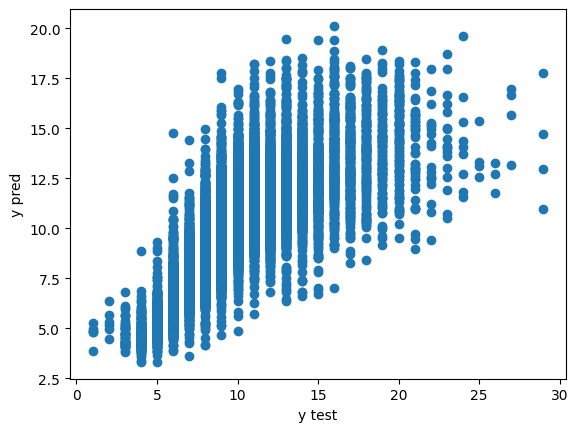

In [15]:
from sklearn import metrics

plt.scatter(y_test, y_pred)
plt.xlabel('y test')
plt.ylabel('y pred')

plt.show()

In [16]:
error = metrics.mean_absolute_percentage_error(y_test, y_pred)
score = metrics.r2_score(y_test, y_pred)

error,score

(0.14482997451158547, 0.5682011394054285)